In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import math
from datetime import datetime

In [4]:
orgs = pd.read_csv("orgs.tsv", sep="\t")
space_objects =  pd.read_csv("satcat.tsv", sep="\t", low_memory= False)
#convert launch date to python scriptable dates instead of an object
space_objects["LDate"] = pd.to_datetime(space_objects["LDate"], errors='coerce')

In [5]:
#print the organizations, where the parent organizations is NASA
NASA_orgs = orgs.loc[orgs["Parent"] == "NASA"]
print(NASA_orgs["Name"])

#what we want is just the UCodes though. 
NASA_orgs = NASA_orgs["UCode"].values


345         NASA Neil A. Armstrong Flight Research Center
461              NASA Ames Research Center, Moffett Field
659                          NASA Beltsville Space Center
911                    NASA Dryden Flight Research Center
1119             NASA Flight Research Center, Edwards AFB
1216                           NASA Glenn Research Center
1223                     NASA Goddard Space Flight Center
1480                                   Jet Propulsion Lab
1484                     NASA Johnson Space Flight Center
1555                    NASA John F. Kennedy Space Center
1586                         NASA Langley Research Center
1587             NASA Engineering and Safety Center, LaRC
1599                           NASA Lewis Research Center
1826                        NASA Manned Spacecraft Center
1828                    NASA Marshall Space Flight Center
1836                       NASA Mississippi Test Facility
1873        National Aeronautics and Space Administration
1888    NASA H

In [6]:
#select all objects, (sattelites, debris, astronauts, payloads) launched from NASA
NASA_objects = space_objects.loc[space_objects["Owner"].isin(NASA_orgs)]

#select only payloads from nasa
NASA_payloads = NASA_objects.loc[lambda x: x["Type"].str.contains(r'^P.*$', regex=True)]

#select all payloads (not only from NASA but throughout the world)
all_payloads = space_objects.loc[lambda x: x["Type"].str.contains(r'^P.*$', regex=True)]

print(NASA_payloads["Name"].count)

14         Explorer 6
19       Vanguard III
21         Explorer 7
28            Tiros 1
59         Explorer 8
             ...     
44341            GPIM
44532          Seeker
44627            ICON
45259      CryoCube 1
45982    Perseverance
Name: Name, Length: 479, dtype: object


In [7]:
y2k = datetime.strptime('2000 01 01', '%Y %m %d')
print(y2k)

2000-01-01 00:00:00


In [8]:
#From all payloads, count how much of them have been launched past 2000-01-01
print("Launched payloads since 2000: ")
print(all_payloads.loc[all_payloads["LDate"] >, "LDate"].count())
print("Number of NASA payloads past 2000: ")
print(NASA_payloads.loc[NASA_payloads["LDate"] > y2k, "LDate"].count())

Launched payloads since 2000: 
5616
Number of NASA payloads past 2000: 
141


In [9]:
print(NASA_payloads.loc[NASA_payloads["Dest"] != "-"])
print(NASA_payloads["LDate"].dtype)

        #JCAT Satcat         Piece          Type                 Name  \
97     S00098  00098      1961 KAP  P   D                 Explorer 10   
220    S00221  00221    1962 ALP 1  P   D                    Ranger 3   
279    S00280  00280     1962 MU 1  P   D                    Ranger 4   
373    S00374  00374  1962 A RHO 1  P   D                   Mariner 2   
438    S00439  00439  1962 B ETA 1  P   D                    Ranger 5   
...       ...    ...           ...           ...                  ...   
43456  S43457  43457     2018-042A  P   D         Mars InSight Lander   
43457  S43458  43458     2018-042B  P   D                     MarCO-A   
43458  S43459  43459     2018-042C  P   D                     MarCO-B   
43591  S43592  43592     2018-065A  P   D          Parker Solar Probe   
45982  S45983  45983     2020-052A  P  LD                Perseverance   

                   PLName      LDate  Parent             SDate Primary  ...  \
97                   P-14 1961-03-25  A00090

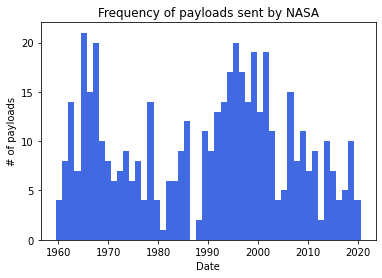

In [10]:
fig, ax = plt.subplots(1,1)
ax.hist(NASA_payloads["LDate"].values, bins=50, color="royalblue")
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.AutoDateFormatter(mdates.AutoDateLocator()))
ax.set_xlabel("Date")
ax.set_ylabel("# of payloads")
ax.set_title("Frequency of payloads sent by NASA")
ax.set_yticks(range(0,21,5))